# Food Delivery Aggregator Database (Pandas)

### Objective

A food delivery aggregator service has generated a database of orders made by registered customers in their online portal. Data analysis has been performed to generate insight into the customer experience and enhance business for food delivery providers.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine Ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/foodhub_order.csv'
df = pd.read_csv(path)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* Each row corresonds with a unique customer order
* The DataFrame has 9 columns corresponding with the following variables:

* Numercial Variables:

  * order_id
  * customer_id
  * cost_of_the_order
  * food_preparation_time
  * delivery_time  
  <br>
* Categorical Variables:

  * restaurant_name
  * cuisine_type
  * day_of_the_week
  * rating

In [ ]:
print('This DataFrame has',df.shape[0],'rows and',df.shape[1],'columns')

This DataFrame has 1898 rows and 9 columns


#### Observations:


* The DataFrame has 1898 rows and 9 columns
* 1898 rows correspond to 1898 distinct food orders

### **Datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
display(df.dtypes.value_counts())

,count
int64,4
object,4
float64,1


#### Observations:

Data Types:

1. float64
    * cost_of_the_order
2. int64
    * order_id
    * customer_id
    * food_preparation_time
    * delivery_time
3. object
    * restaurant_name
    * cuisine_type
    * day_of_the_week
    * rating

### **Missing Data Analysis**

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

* There are no null or missing values in this dataset
* 39% of orders are marked as "Not rated"
* Rating contains the variable "Not given" as well as numerical values


### **Statistical Summary of Database**

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

* Food preparation times have a range between 20 and 35 minutes with no outliers and low variablity
* The average preparation time is 27 minutes and a standard deviation of 4.6 minutes
* The maximum preparation time is 35 minutes


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **EDA 01:** Cost of Orders

#### Observations:

* The minimum order cost is 4.5 dollars
* The maximum order cost is 35.4 dollars
* The average order cost is 16.5 dollars



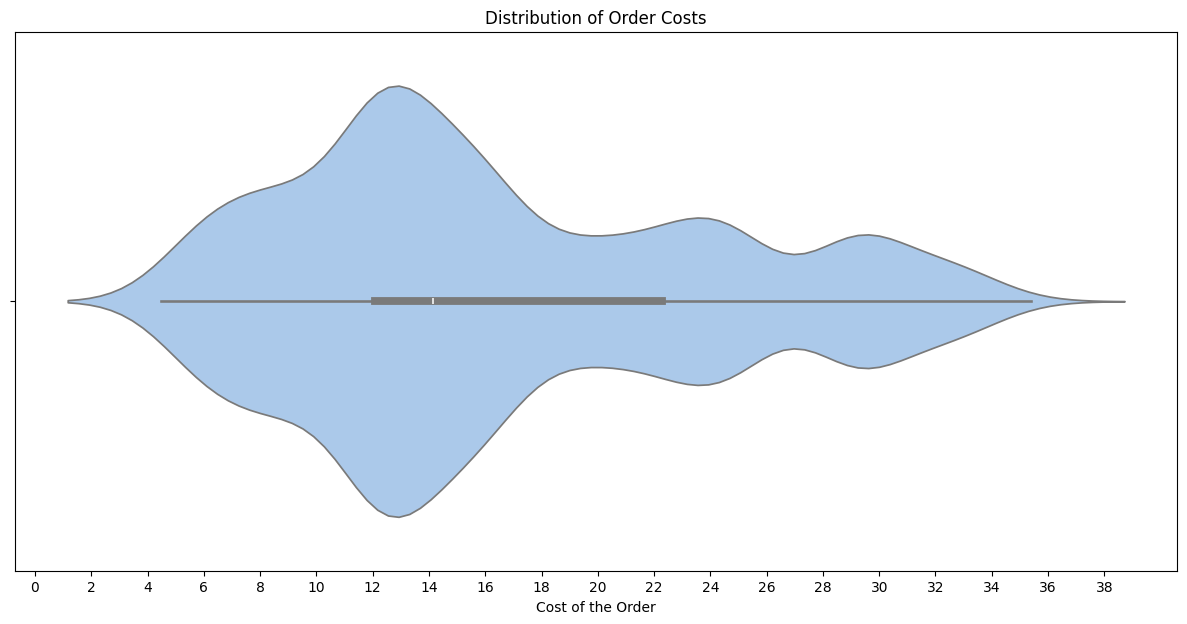

In [ ]:
plt.figure(figsize = (15,7))
sns.violinplot(x='cost_of_the_order', data=df, palette = 'pastel')
plt.title('Distribution of Order Costs')
plt.xticks(list(range(0,40,2)))
plt.xlabel('Cost of the Order');

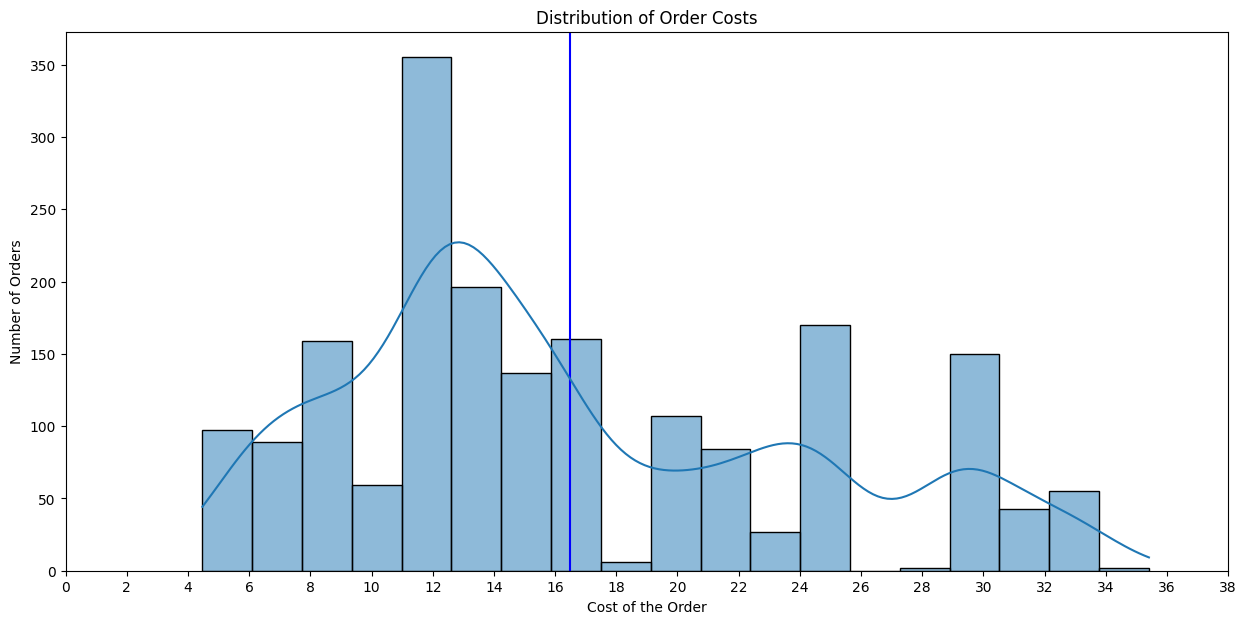

In [ ]:
plt.figure(figsize = (15,7))
plt.axvline(df['cost_of_the_order'].mean(), color = 'b')
sns.histplot(data=df,x='cost_of_the_order', kde = True)
plt.title('Distribution of Order Costs')
plt.xticks(list(range(0,40,2)))
plt.xlabel('Cost of the Order')
plt.ylabel('Number of Orders');

### **EDA 02:** Food Preperation Time

#### Observations:

* The minimum food preperation time is 20.0 dollars
* The maximum food preperation time is 35.0 dollars
* The average food preperation time is 27.4 dollars
* The distribution of food preparation times is relatively uniform



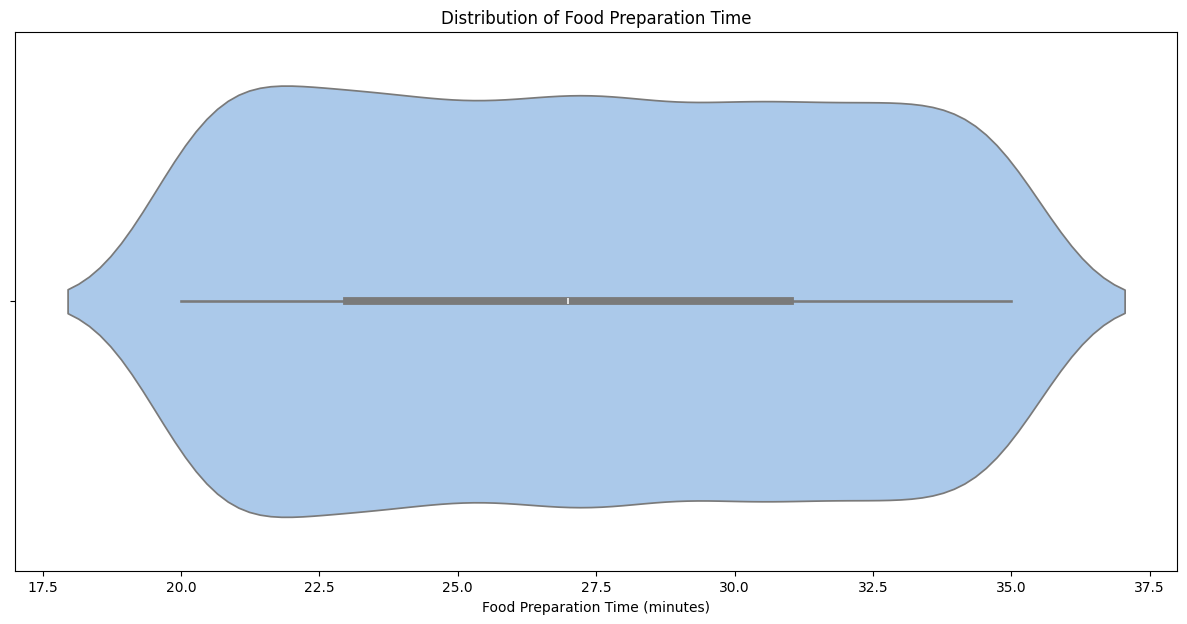

In [ ]:
plt.figure(figsize = (15,7))
sns.violinplot(x='food_preparation_time', data=df, palette = 'pastel')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.xlim(17, 38);

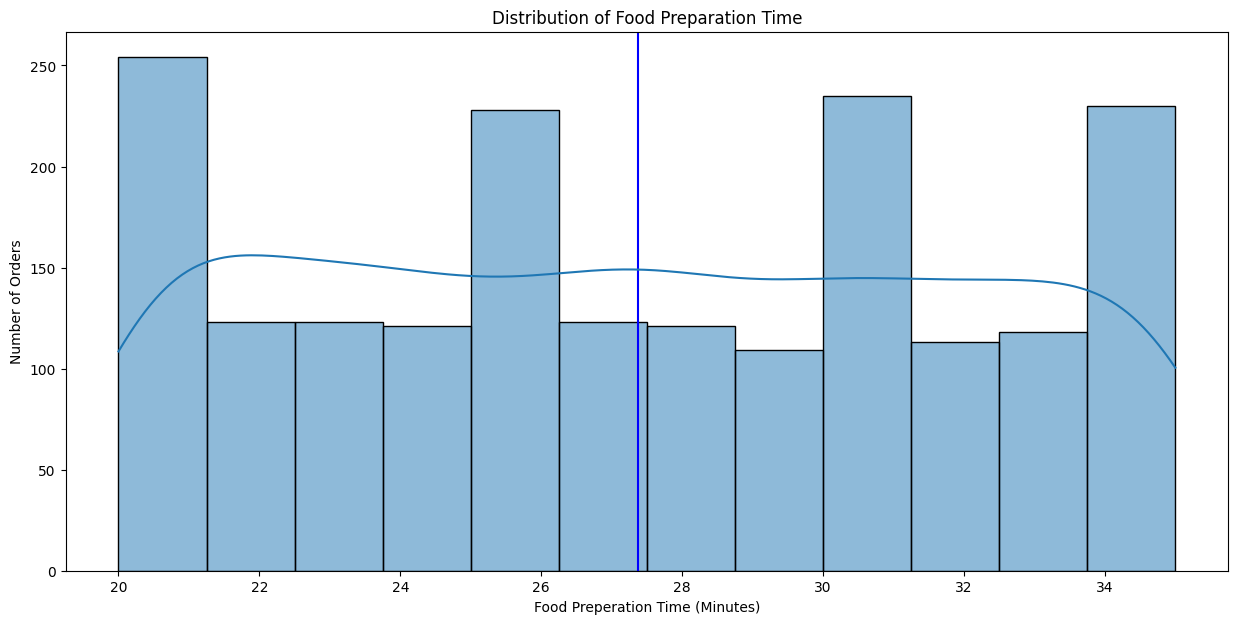

In [ ]:
plt.figure(figsize = (15,7))
plt.axvline(df['food_preparation_time'].mean(), color = 'b')
sns.histplot(data=df,x='food_preparation_time', kde = True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preperation Time (Minutes)')
plt.ylabel('Number of Orders');

### **EDA 03:** Food Delivery Time

#### Observations:

* The minimum food delivery time is 15.0 minutes
* The maximum food delivery time is 33.0 minutes
* The average food delivery time is 24.2 minutes
* No outliers present in food delivery times



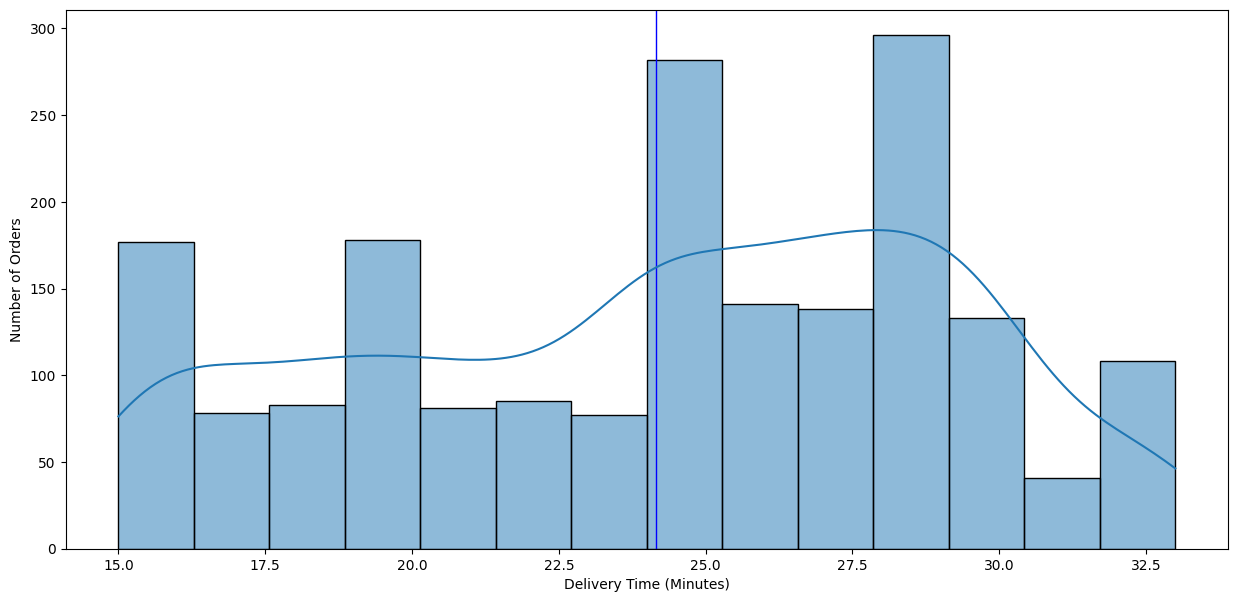

In [ ]:
plt.subplots(figsize = (15,7))
plt.axvline(df['delivery_time'].mean(), color='b', linewidth=1)
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
sns.histplot(data = df, x = 'delivery_time', kde = True);

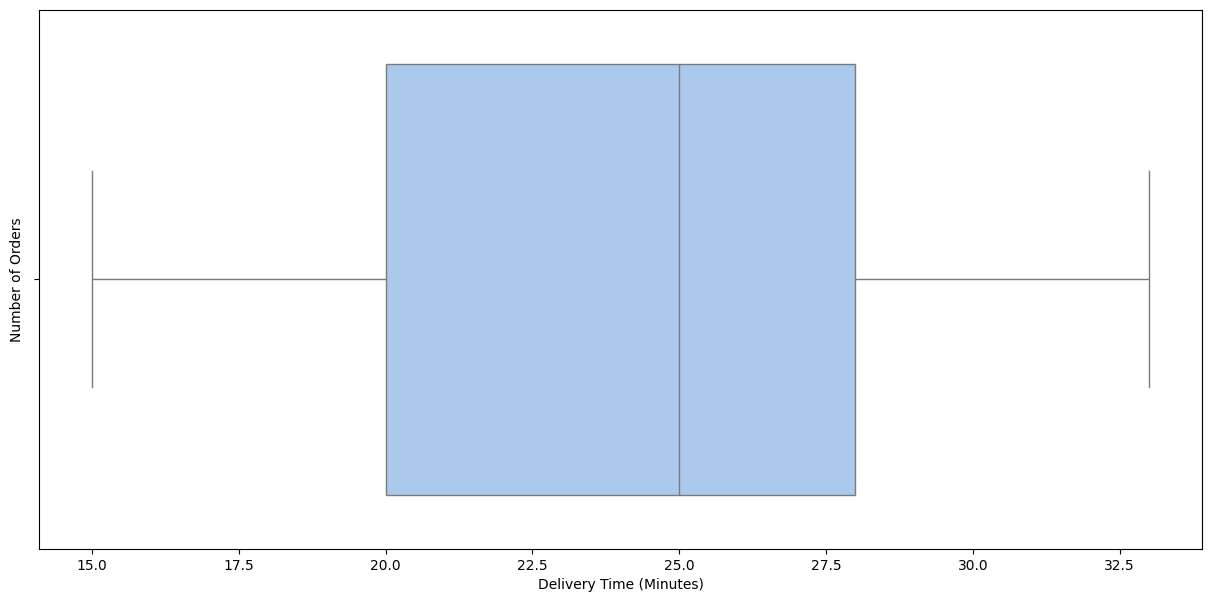

In [ ]:
plt.subplots(figsize = (15,7))
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
sns.boxplot(data = df, x = 'delivery_time', palette = 'pastel');

### **EDA 04:** Customer Rating

#### Observations:

* Orders with ratings range from 3-5 with the majority given a 5 point rating
* Ratings are skewed towards five with no ratings under 3
* 39% of orders placed lack a specific rating ("Not given")
* 31% of orders placed have a rating of 5
* 10% of orders placed have a rating of 3

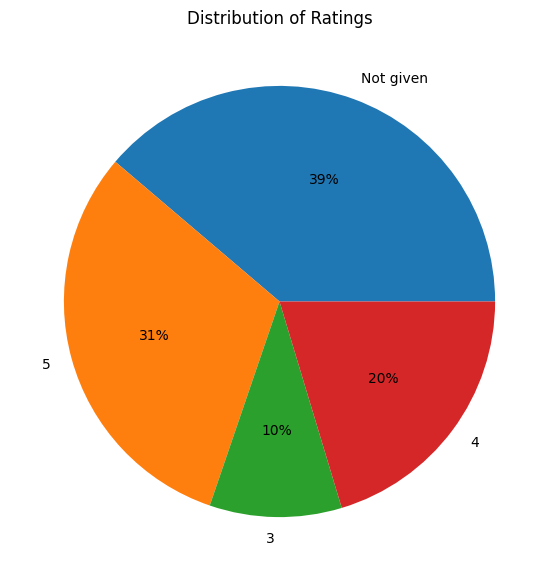

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Distribution of Ratings')
plt.pie(df.rating.value_counts(sort = False), labels = df.rating.unique(), autopct = '%1.f%%');

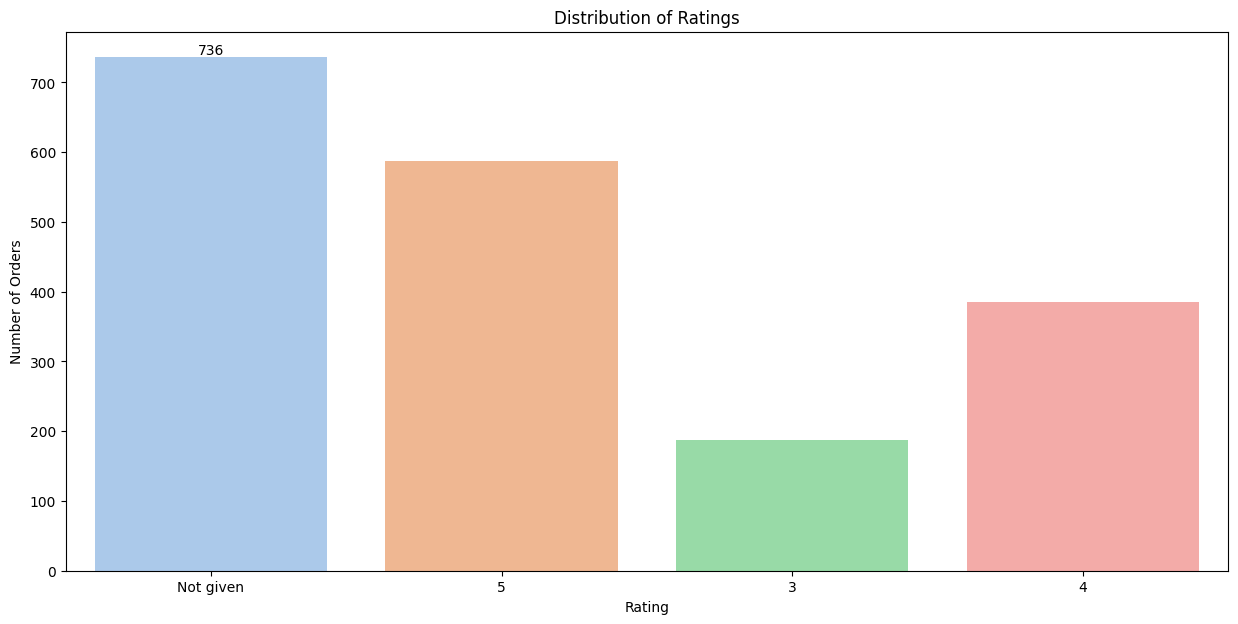

In [ ]:
plt.figure(figsize = (15,7))
ax=sns.countplot(data=df, x='rating', palette = 'pastel')
ax.set(xlabel='Rating')
ax.set(ylabel='Number of Orders')
plt.title('Distribution of Ratings')
ax.bar_label(ax.containers[0]);



```
# This is formatted as code
```

### **EDA 05:** Order Day (day of the week)

#### Observations:

* The majority of orders are placed on the weekend
* 71% of orders are placed on a weekend day
* 29% of orders are placed on a week day


In [ ]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

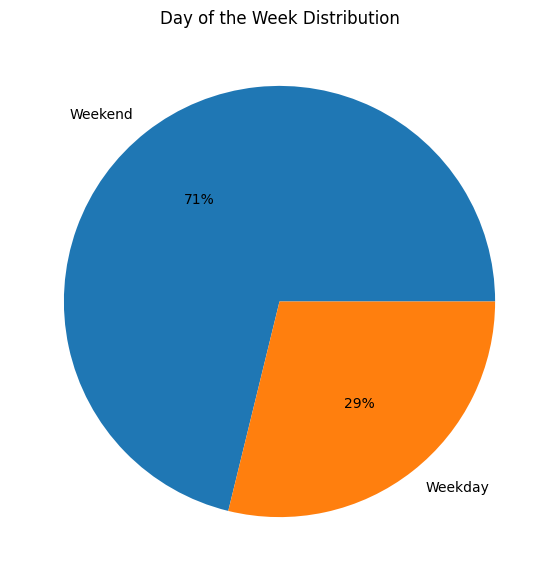

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Day of the Week Distribution')
plt.pie(df.day_of_the_week.value_counts(sort = False), labels = df.day_of_the_week.unique(), autopct = '%1.f%%');

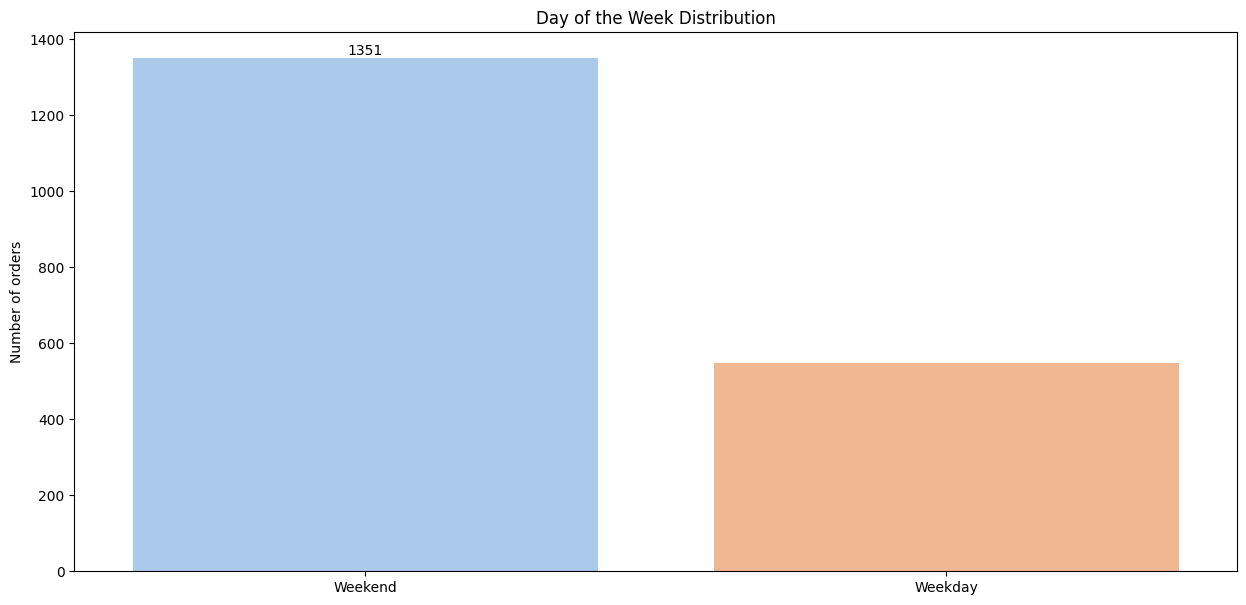

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data=df,x='day_of_the_week', palette = 'pastel')
plt.xlabel(xlabel='')
plt.ylabel(ylabel='Number of orders')
plt.title('Day of the Week Distribution')
ax.bar_label(ax.containers[0]);

### **EDA 06:** Cuisine Type

#### Observations:

* The most popular cuisine is American with almost 600 orders placed
* Other top cuisine types with over 200 orders placed are as ordered:

  1. Japanese
  2. Italian
  3. Chinese

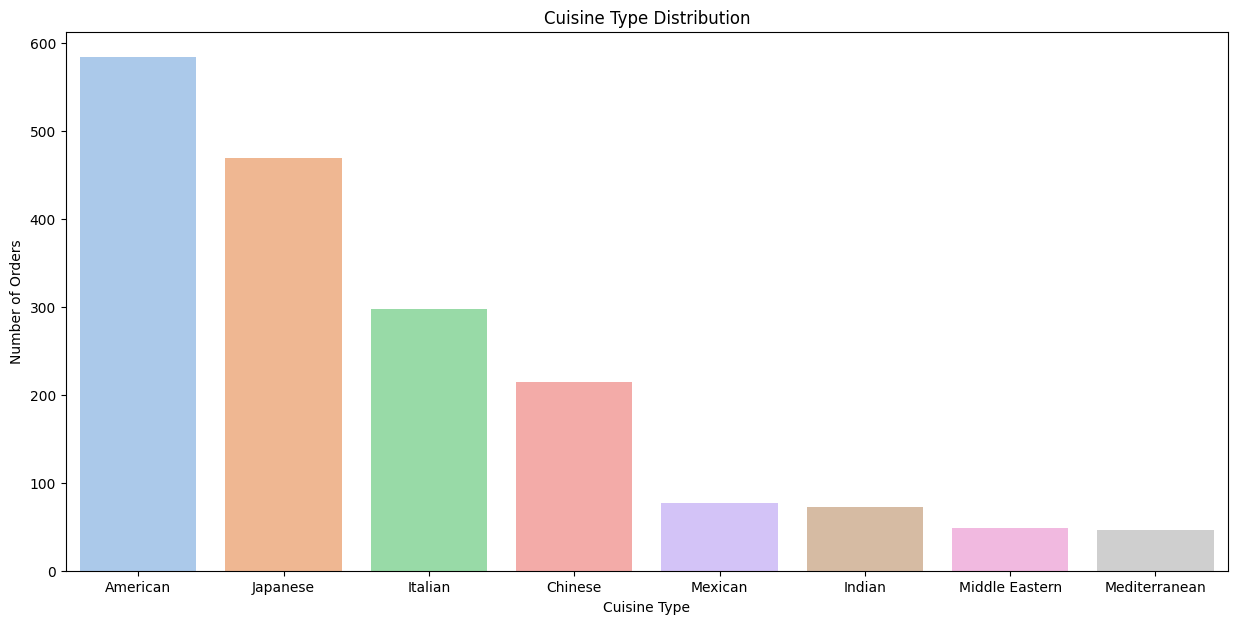

In [ ]:
plt.subplots(figsize = (15,7))
plt.title('Cuisine Type Distribution')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
sns.countplot(data = df, x = 'cuisine_type', palette = 'pastel', order = df.cuisine_type.value_counts().iloc[:8].index);

### **EDA 07**: Top 5 Restaurants (by orders received)

In [ ]:
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

* The restaurant with the most orders is Shake Shack with 219 orders placed. Followed by:

  2. The Meatball Shop (132 orders placed)
  3. Blue Ribbon Sushi (119 orders placed)
  4. Blue Ribbon Fried Chicken (96 orders placed)
  5. Parm (68 orders placed)



### **EDA 08:** Most Popular Cuisines on Weekends

In [ ]:
df[df['day_of_the_week']== 'Weekend']['cuisine_type'].value_counts().head(3)

cuisine_type
American    415
Japanese    335
Italian     207
Name: count, dtype: int64

#### Observations:

* American cusisine is the most popular cusine on weekends with 415 orders placed. Followed by:

  * Japanese (335 orders placed)
  * Italian (207 orders placed)

### **EDA 09:** Percentage of Orders Over $20

In [ ]:
100*round(len(df[df['cost_of_the_order']>20])/len(df),3)

29.2

#### Observations:

* 29% of orders placed cost more than $20

### **EDA 10:** Order Delivery Time

In [ ]:
round(df['delivery_time'].mean())

24

#### Observations:

* The mean order delivery time is 24.2 minutes

### **EDA 11:** Top 5 Most Frequent Customers

In [ ]:
df['customer_id'].value_counts().head(10)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: count, dtype: int64

#### Observations:

* Most frequent customers (top 5):

|Customer ID|Number of Orders|
|:-:|:-:|
|52832|13|
|47440|10|
|83287|9|
|250494|8|
|259341|7|

* The following customers also have 7 orders placed and are tied for 5th:

|Customer ID|Number of Orders|
|:-:|:-:|
|82041|7|
|65009|7|
|276192|7|


### Multivariate Analysis

### **EDA 12:** Cost of Orders, Food Preparation Time, Delivery Time

---




In [ ]:
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

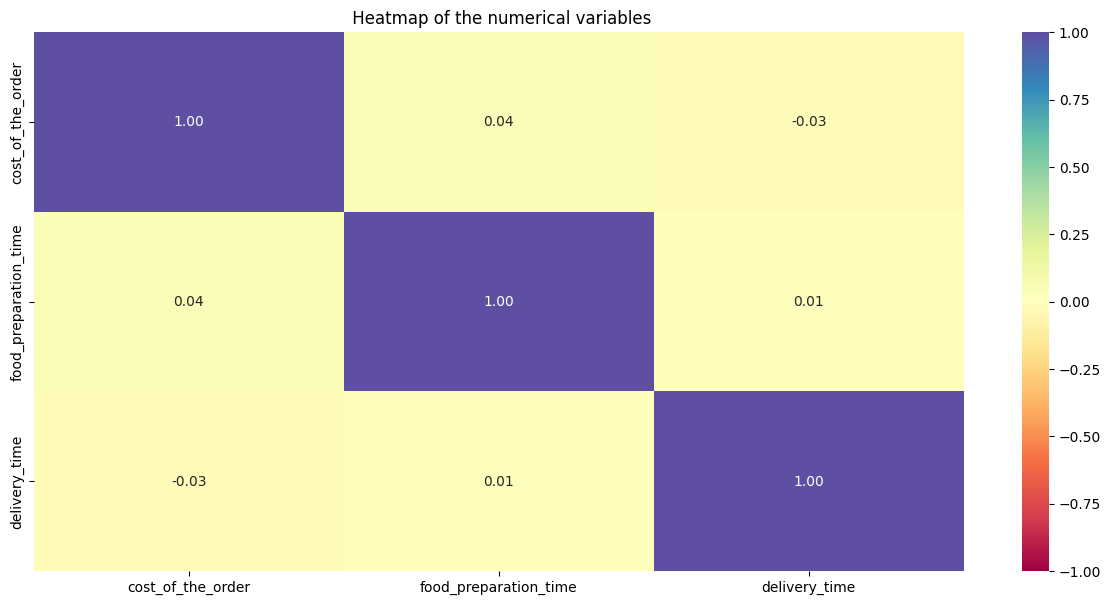

In [ ]:
plt.figure(figsize =(15,7))
sns.heatmap(data =df[num_var].corr(),annot =True, vmin =-1, vmax =1, fmt ='.2f',cmap ="Spectral");
plt.title(" Heatmap of the numerical variables");

<Figure size 1500x700 with 0 Axes>

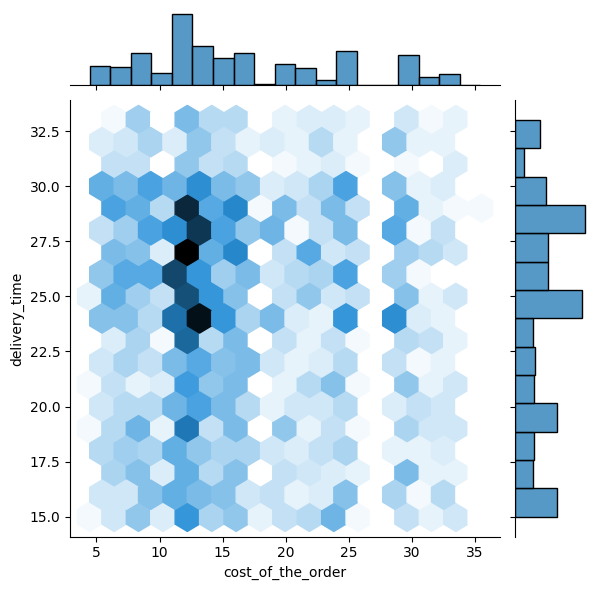

In [ ]:
plt.figure(figsize =(15,7))
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex');

<Figure size 1500x700 with 0 Axes>

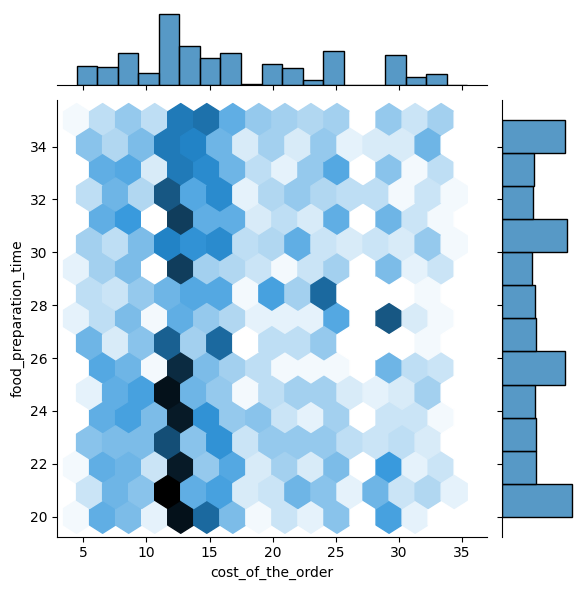

In [ ]:
plt.figure(figsize =(15,7))
sns.jointplot(data =df, x ='cost_of_the_order', y ='food_preparation_time', kind ='hex');

### **EDA 13:** Count of Orders, Cuisine Type, Top 5 Restaurants, Cost of Orders, Day of Week


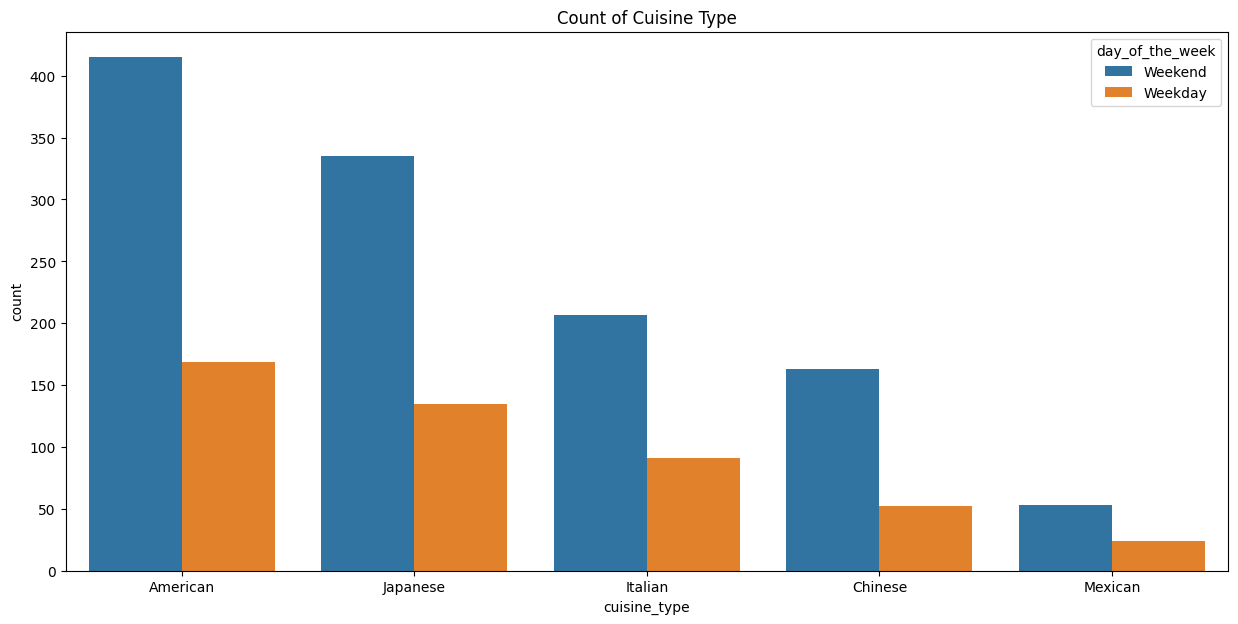

In [ ]:
plt.figure(figsize =(15,7))
sns.countplot( data =df, x ='cuisine_type',order =df['cuisine_type'].value_counts().head().index,hue ='day_of_the_week');
plt.title("Count of Cuisine Type");

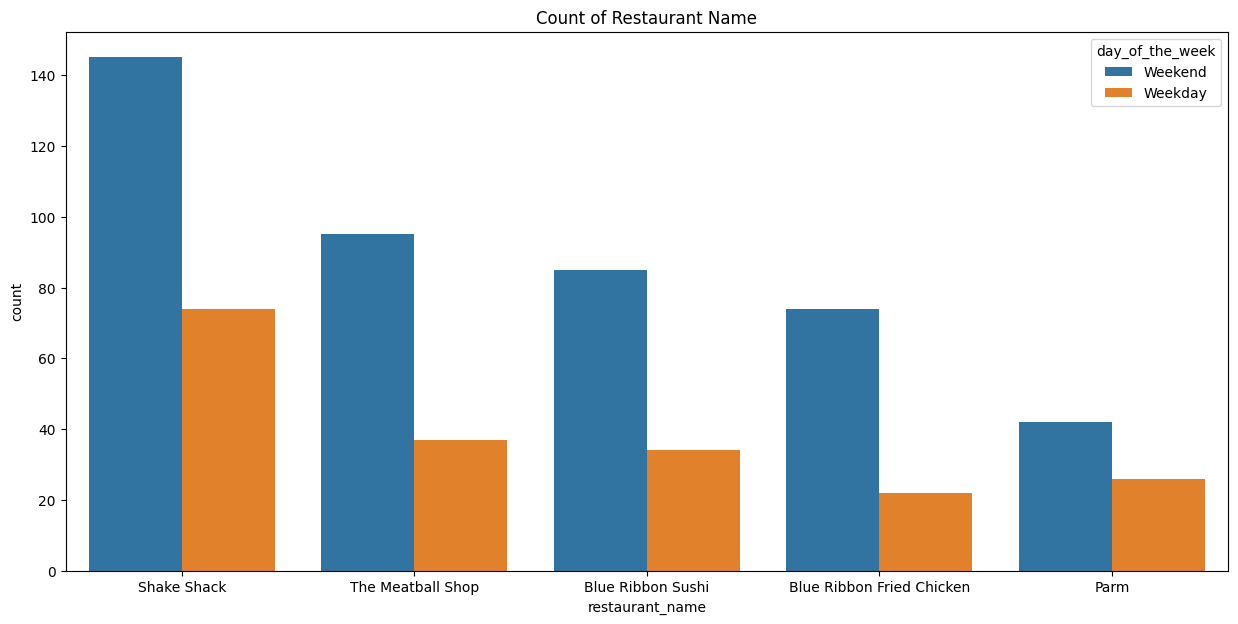

In [ ]:
plt.figure(figsize =(15,7))
sns.countplot( data =df, x ='restaurant_name',order =df['restaurant_name'].value_counts().head().index,hue ='day_of_the_week');
plt.title("Count of Restaurant Name");

<Figure size 1500x700 with 0 Axes>

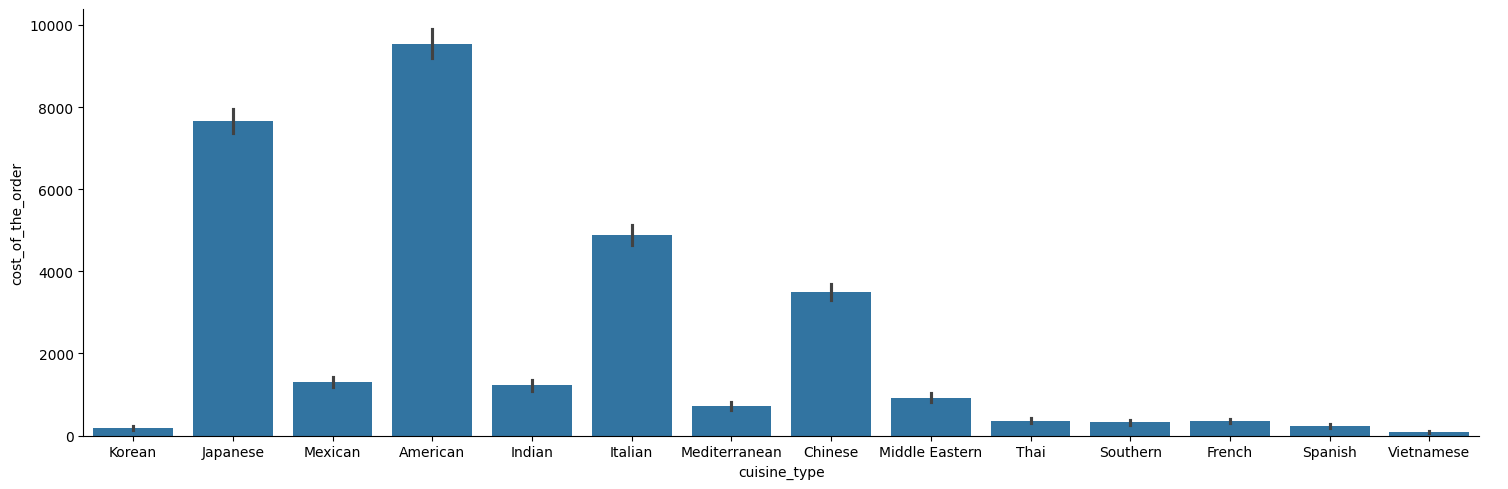

In [ ]:
plt.figure(figsize =(15,7))
sns.catplot( data =df, x ='cuisine_type', y='cost_of_the_order', estimator =np.sum, kind ='bar', height = 5, aspect =3);

<Figure size 1500x700 with 0 Axes>

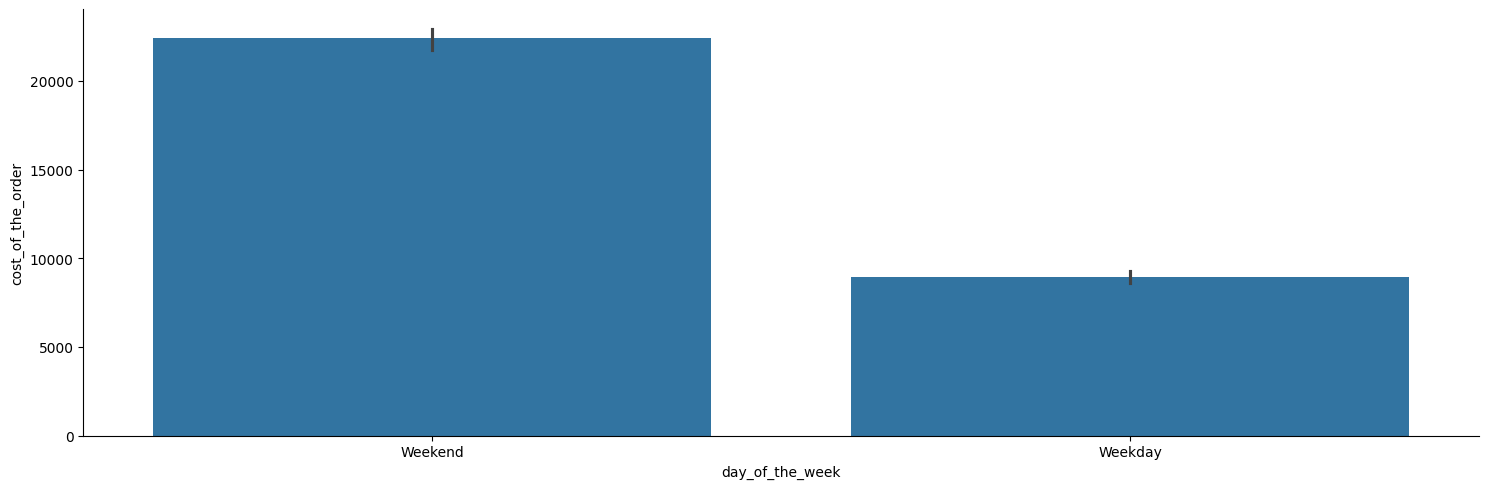

In [ ]:
plt.figure(figsize =(15,7))
sns.catplot( data =df, x ='day_of_the_week', y='cost_of_the_order', estimator =np.sum, kind ='bar', height = 5, aspect =3);

### **EDA 14:** Restaurants with a Rating Count > 50 and Average Rating > 4

In [ ]:
df_nan = df.replace(to_replace = 'Not given', value = np.NaN)

df_nan['rating'] = df_nan['rating'].astype(dtype = 'float', errors = 'ignore')

ratings_t = df_nan.groupby(['restaurant_name'])['rating'].mean()
ratings_c = df_nan.groupby(['restaurant_name'])['rating'].count()

df_all = pd.merge(ratings_t,ratings_c, how = 'inner', on = ratings_t.index)

df_all.rename(columns = {'key_0': 'Restaurant Name','rating_x': 'avg_ratings', 'rating_y':'count_ratings'}, inplace = True)

df_all[(df_all['avg_ratings']>4) & (df_all['count_ratings']>50)].sort_values(by = 'avg_ratings', ascending= False)

,Restaurant Name,avg_ratings,count_ratings
153,The Meatball Shop,4.511905,84
20,Blue Ribbon Fried Chicken,4.328125,64
136,Shake Shack,4.278195,133
21,Blue Ribbon Sushi,4.219178,73


#### Observations:

* Just 4 restaurants qualify for the promotional offer and meet the requirements of having more than 50 individual ratings and an average rating greater than 4
* The Meatball Shop is the highest rated restaurant with an average rating of 4.5

  Followed by:

    2. Blue Ribbon Fried Chicken (4.3 average rating)
    3. Shake Shack (4.3 average rating)
    4. Blue Ribbon Sushi (4.2 average rating)

### **EDA 15:** Portal Fees Billed to Restaurant (25% on orders > \$20 and 15% on orders > $5)



In [ ]:
revenue = 0

for i in df['cost_of_the_order']:
  if i > 20:
    revenue += i * 0.25
  elif(5<i<20):
    revenue += i * 0.15
  else:
    revenue += i * 0

print('Total Net Revenue ($):', round(revenue,1))

Total Net Revenue ($): 6166.3


#### Observations:

* The total net revenue for all orders is: $6,166

### **EDA 16:** Percentage of Orders with Delivery Time > 60 minutes (from order placed to delivery)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

round(100*len(df[df['total_time']>60])/len(df),2)

10.54

#### Observations:

* 10.5% of all orders placed took over 60 minutes to reach the customer from the time the order was placed

### **EDA 17:** Delivery Time of Orders on Weekdays and Weekends

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

* Orders are delivered faster during weekends VS weekdays
* The average delivery time on weekends is 22 minutes
* The average delivery time on weekdays is 28 minutes